# Einführung in das Machine Learning (Woche 3): Von Daten zu Vorhersagen

In dieser Vorlesung werden Sie lernen, wie Sie von einem Beispieldatensatz im csv-Format zu einem ersten Machine-Learning Modell gelangen.

## Jupyter und Jupyter Notebooks

Jupyter ist ein Framework zum interaktiven Programmieren. Letzte Woche haben Sie bereits im Tutorium Python und Pip aufgesetzt. Deshalb ist es nun ganz einfach, dass Sie auch Jupyter aufsetzen, installieren Sie es einfach via:

``` pip install jupyter ```

In Pycharm können Sie ein Notebook lokal starten (dies habe ich getan; [offizielle Hilfeseite für Pycharm](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html)), ansonsten führen Sie einfach:

``` jupyter lab ```

um es im Browser zu starten. Bei Problemen konsultieren Sie bitte zuerst die Dokumentation von Jupyter ([Dokumentation](https://docs.jupyter.org/en/latest/)) und fragen, wenn die Probleme weiter bestehen, im Tutorium.

Der Vorteil von Jupyter Notebooks gegenüber reinem Scripting in nativem Python ist, dass Sie Zwischenergebnisse sich anzeigen lassen können und interaktiv schnell Feedback auf kleine Code-Snippets bekommen können. Wir verwenden es hier in der Vorlesung für Lernzwecke. Ich möchte darauf hinweisen, dass Sie Jupyter auch in der Industrie zum schnellen Testen von Ideen nutzen können oder um Kunden etwas zu präsentieren (Stichwort: Fast Prototyping), allerdings ist es zum Produktivbetrieb regelmäßig ungeeignet, da die interaktive Engine (der Jupyter-Server) im Hintergrund die Ausführung Ihres Programmes verlangsamt.

In [1]:
print("Hello World!")


Hello World!


## Machine Learning Bibliotheken

Wir werden in dieser Vorlesung heute drei sehr grundlegende aber auch wichtige Machine Learning Bibliotheken kennenlernen: Pandas, Numpy und Scikit-Learn.

## Pandas

Pandas ([Offizielle Website](https://pandas.pydata.org/)) erlaubt es Ihnen Daten in eine Art In-Memory-Datenbank zu laden und dort zu manipulieren. Im übernächsten Tutorium, nachdem Sie in einer ersten Übung etwas Erfahrung mit Pandas sammeln konnten, werden wir Ihnen auch ein paar Best Practices zum Programmieren mit Pandas vorstellen. Numpy und Scikit-Learn werden wir weiter unten besprechen, sobald wir es benötigen.

Falls Sie es noch nicht getan haben, installieren Sie Pandas wie gewohnt mit:

``` pip install pandas ```

In [2]:
%pip install pandas
import pandas
from pandas import DataFrame # Das DataFrame (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) ist die zentrale In-Memory Struktur in Pandas. Sie können es sich wie eine kleine Excel-Tabelle oder eine relationale Datenbank in Ihrem Hauptspeicher vorstellen.


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Der Titanic Datensatz

Im Repository zur Vorlesung finden Sie einen Ordner namens titanic_data. Er stammt aus der [Titanic-Einsteigerchallenge von Kaggle](https://www.kaggle.com/competitions/titanic/overview). In ihm enthalten sind verschiedene Merkmale der Passagiere der [Titanic-Fahrt](de.wikipedia.org/wiki/Titanic_(Schiff)), die in der Katastrophe endete und vielen Menschen das Leben kostete. Wir möchten herausfinden, ob wir anhand statistischer Variablen voraussagen können, wer bei dem Unglück überlebt hat.

1. Frage (Erinnerung der letzten Woche): Wieso ist das Wort "statistisch" im obigen Satz wichtig? Was unterscheidet "statistische Variablen" von "kausalen Variablen"?

In [3]:
import os

df = pandas.read_csv(os.path.join("titanic_data", "train.csv"))

# Ignorieren Sie für den Moment die test.csv und test_transformed.csv. Wir gehen später darauf ein, warum es sinnvoll ist, zwischen Trainings- und Testdatensatz zu unterscheiden.

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


2. Frage (Erinnerung der letzten Woche): Unterscheiden Sie, welche Attribute nominal, ordinal, diskret und kontinuierlich sind! Bei welchen Attributen hätten Sie Alternative Wahlmöglichkeiten zur Codierung gehabt?
3. Frage: Welches Problem hätten Sie, wenn Sie in der Spalte "Sex" folgende Codierung wählen würden: Male = 0, Female = 1
4. Frage: Welche Annahmen trifft der Datensatz durch seine Codierung?

Wir wollen die Spalte "Survived" erraten, daher entnehmen wir sie dem DataFrame und löschen sie dann anschließend (Es wäre etwas langweilig, wenn wir die Antwort bereits im Datensatz hätten).

In [4]:
target = df["Survived"]
df = df.drop(columns=["Survived"])
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Datenauswahl und Recodierung

Wie letzte Woche bereits diskutiert, nutzen wir nun "One-Hot Encoding" für die Spalte "Sex" und "Embarked" (nominale Attribute), außerdem verwerfen wir die Spalten "PassengerId", "Name" und "Ticket" als unbedeutend für unsere Aufgabe.

5. Frage: Welche Informationen könnten uns durch das Ausschließen dieser drei Spalten verloren gehen?
6. Frage: Welche Spalte hätten wir zusätzlich noch löschen können? Nennen Sie zumindest ein Vor- und Nachteil Ihrer Wahl.

In [6]:
df = df.drop(columns=["PassengerId", "Name", "Ticket"])

sex_one_hot = pandas.get_dummies(df["Sex"], dtype="int")
embarked_one_hot = pandas.get_dummies(df["Embarked"], dtype="int")

sex_one_hot

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [7]:
embarked_one_hot

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [8]:
df = df.drop(columns = ["Sex", "Embarked"]) # Es gibt kein Grund die gleiche Information zweimal im Datensatz codiert zu halten
df = df.join(sex_one_hot)
df = df.join(embarked_one_hot)

df.head(10)

,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,C,Q,S
0,3,22.0,1,0,7.2500,NaN,0,1,0,0,1
1,1,38.0,1,0,71.2833,C85,1,0,1,0,0
2,3,26.0,0,0,7.9250,NaN,1,0,0,0,1
3,1,35.0,1,0,53.1000,C123,1,0,0,0,1
4,3,35.0,0,0,8.0500,NaN,0,1,0,0,1
5,3,NaN,0,0,8.4583,NaN,0,1,0,1,0
6,1,54.0,0,0,51.8625,E46,0,1,0,0,1
7,3,2.0,3,1,21.0750,NaN,0,1,0,0,1
8,3,27.0,0,2,11.1333,NaN,1,0,0,0,1
9,2,14.0,1,0,30.0708,NaN,1,0,1,0,0


## Funktionale Abhängigkeiten

Wir haben gerade die originalen Spalten "Sex" und "Embarked" verworfen, da wir Ihre Information vollständig durch unser One-Hot Encoding abgebildet haben. Aus demselben Grund, können wir nun eine der Spalten "female" oder "male" streichen und eine der Spalten "C", "Q" oder "S", denn es gilt female = 1 genau dann wenn male = 0 und female = 0 genau dann wenn male = 1. "Female" beschreibt also "male" vollständig und dasselbe vice versa. Wir entscheiden uns, "male" zu streichen. Analoges gilt für zwei beliebige Attribute aus der Menge {"C","Q","S"}. Hier entscheiden wir uns "S" zu streichen.

Etwas heikler ist die Beziehung zwischen den Spalten "Pclass" (Passenger class, zu Deutsch: Fahrklasse) und "Fare" (zu Deutsch: Ticketgebühr). Aus unserer Erfahrungswelt wissen wir, dass eine höhere Fahrklasse eine höhere Ticketgebühr zur Folge hat. Jedoch wissen wir auch, dass dies nicht immer eine 1:1 Beziehung ist (wenn beispielsweise Fahrkarten "Last Minute" für einen billigeren Preis verkauft werden, um sie noch loszuwerden). Hier müssen wir sogleich noch unsere Hypothese überprüfen, ob die Grenzen "scharf" sind.

In [9]:
df = df.drop(columns = ["male", "S"])

In [10]:
fares = df["Fare"]
passenger_classes = df["Pclass"]

passenger_class_1_indices = df.index[df['Pclass'] == 1]
passenger_class_2_indices = df.index[df['Pclass'] == 2]
passenger_class_3_indices = df.index[df['Pclass'] == 3]

fares_class_1 = fares[passenger_class_1_indices]
fares_class_2 = fares[passenger_class_2_indices]
fares_class_3 = fares[passenger_class_3_indices]

print(f"Tickets for class 1 were sold at max for: {fares_class_1.max()} and at min for {fares_class_1.min()}")
print(f"Tickets for class 2 were sold at max for: {fares_class_2.max()} and at min for {fares_class_2.min()}")
print(f"Tickets for class 3 were sold at max for: {fares_class_3.max()} and at min for {fares_class_3.min()}")

Tickets for class 1 were sold at max for: 512.3292 and at min for 0.0
Tickets for class 2 were sold at max for: 73.5 and at min for 0.0
Tickets for class 3 were sold at max for: 69.55 and at min for 0.0


Der Ticketpreis ist demnach nicht stark mit der Fahrtklasse korreliert. Dementsprechend lassen wir beide Spalten stehen.

7. Frage: Welche Gründe könnte es für diesen fehlenden Zusammenhang geben?

In [11]:
df.head(10)

,Pclass,Age,SibSp,Parch,Fare,Cabin,female,C,Q
0,3,22.0,1,0,7.2500,NaN,0,0,0
1,1,38.0,1,0,71.2833,C85,1,1,0
2,3,26.0,0,0,7.9250,NaN,1,0,0
3,1,35.0,1,0,53.1000,C123,1,0,0
4,3,35.0,0,0,8.0500,NaN,0,0,0
5,3,NaN,0,0,8.4583,NaN,0,0,1
6,1,54.0,0,0,51.8625,E46,0,0,0
7,3,2.0,3,1,21.0750,NaN,0,0,0
8,3,27.0,0,2,11.1333,NaN,1,0,0
9,2,14.0,1,0,30.0708,NaN,1,1,0


## Missing Values

Wie Sie sicher schon bemerkt haben, treten in den Spalten "Age" und "Cabin" der Marker "NaN" (Not a Number) auf. Dieser Wert verweist darauf, dass in einer bestimmten Zelle ein Wert nicht eingetragen wurde (engl. Missing Value). Pandas repräsentiert dieses "Nichts" durch einen NaN-Wert. Nun müssen wir uns aber positionieren, wie wir mit diesen Werten umgehen wollen, da spätere Machine Learning Algorithmen ein "Nichts" nicht verarbeiten können, sondern es stets interpretieren müssen. Eine gute Strategie ist es sodann, zuerst zu ermitteln, wie hoch der Anteil von NaN-Werten in einer Spalte ist.

8. Frage: Durch welche Umstände kann es zu Missing Values in ihren Datensatz kommen? Nennen Sie ein Beispiel bezüglich des Titanic-Datensatzes und eines bezüglich von Labormessungen!

In [12]:
cabin = df["Cabin"]
age = df["Age"]

print(f"NaN share in Cabin: {cabin.isna().sum()/len(cabin)*100:.2f} %")
print(f"NaN share in Age: {age.isna().sum()/len(cabin)*100:.2f} %")

NaN share in Cabin: 77.10 %
NaN share in Age: 19.87 %


Wenn Sie mit NaN-Werten umgehen müssen, haben Sie grundsätzlich die Wahl zwischen zwei Optionen: Manipulieren Sie die Ausgangsdaten oder schließen Sie Zeilen bzw. Spalten aus, wenn Ihr Informationsgehalt gering ist. Für die Spalte "Cabin" müssten wir über 75% der Daten "erfinden", wenn wir alle NaN-Werte ersetzen wollen. Auch wenn diese Spalte theoretisch Informationen über die Position der Kabine auf dem Schiff verraten kann, so wäre dieser Eingriff massiv und unsere "Ergänzungen" würden die Verteilung der Daten dieser Spalte dominieren. Daher entscheiden wir uns in diesem Fall dafür die Spalte zu entfernen.

Bei der Spalte "Age" entscheiden wir uns hingegen dafür die Information zu ergänzen, da es auch nicht akzeptabel wäre, 20% unserer Zeilen zu verwerfen. Zusätzlich müssten wir sonst die Prädiktion verweigern, sobald ein neuer Datenpunkt dieses Attribut nicht setzt. Es existieren grundsätzlich vier Varianten, um Missing Values zu ergänzen:

- Mean (Durchschnittswert)
- Median (Mittelwert)
- Mode (häufigster Wert)
- Konstante

Da es sich bei dem Alter um einen stark begrenzten aber nicht unbedingt symmetrischen Datenbereich handelt, entscheiden wir uns hier für den Median. Im Tutorium werden Sie diese und die anderen drei weiteren Varianten (Mean, Mode und Konstante) ausführlich untersuchen. Vgl. Sie bitte auch mit den Vorlesungsfolien.

## Numpy

Zur Umsetzung dieser Operation werden wir unsere zweite Bibliothek kennenlernen: [Numpy](https://numpy.org/). Numpy erlaubt es Ihnen mächtige Matrix-Operationen mit einfachen Befehlen durchzuführen. Hier werden wir es benutzen, um mit einem Schritt den Median eines Arrays zu berechnen und alle Nan-Werte mit diesem zu ersetzen. Wenn noch nicht geschehen installieren Sie numpy via:

``` pip install numpy ```

9. Frage: Wie unterscheidet sich Numpy damit von Pandas? Was ist der Unterschied zwischen einer Matrix (Numpy) und (In-Memory) Datenbank-Sicht (Pandas) der Daten?

In [13]:
%pip install numpy
import numpy


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
df = df.drop(columns=["Cabin"])
age = age.to_numpy() # Übergang von Pandas zu Numpy über explizites Interface

In [15]:
age

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [16]:
print(f"The minimum age is: {numpy.nanmin(age)}") # Nanmin ignoriert alle NaN Werte. Einfach nur "min" zu rufen, würde hingegen in der Rückgabe NaN resultieren.
print(f"For reference: {numpy.min(age)}") # Das Gleiche gilt für die weiteren Funktionen.
print(f"The maximum age is: {numpy.nanmax(age)}")
print(f"The mean value is: {numpy.nanmean(age)}") # Der Mean muss kein Element der Daten selber sein!
print(f"The median age is: {numpy.nanmedian(age)}")
vals,counts = numpy.unique(age[~numpy.isnan(age)], return_counts=True) # ~numpy.isnan(age) exkludiert für einen Moment alle NaN-Werte. ~ ist die Negation.
print(f"The mode age is: {vals[numpy.argmax(counts)]}") # Der Mode lässt sich leider noch immer nicht komfortabel in einem Schritt berechnen
print(f"For reference: All age values \n {vals} \n with their respective counts \n {counts}")

The minimum age is: 0.42
For reference: nan
The maximum age is: 80.0
The mean value is: 29.69911764705882
The median age is: 28.0
The mode age is: 24.0
For reference: All age values 
 [ 0.42  0.67  0.75  0.83  0.92  1.    2.    3.    4.    5.    6.    7.
  8.    9.   10.   11.   12.   13.   14.   14.5  15.   16.   17.   18.
 19.   20.   20.5  21.   22.   23.   23.5  24.   24.5  25.   26.   27.
 28.   28.5  29.   30.   30.5  31.   32.   32.5  33.   34.   34.5  35.
 36.   36.5  37.   38.   39.   40.   40.5  41.   42.   43.   44.   45.
 45.5  46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   55.5
 56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   66.   70.
 70.5  71.   74.   80.  ] 
 with their respective counts 
 [ 1  1  2  2  1  7 10  6 10  4  3  3  4  8  2  4  1  2  6  1  5 17 13 26
 25 15  1 24 27 15  1 30  1 23 18 18 25  2 20 25  2 17 18  2 15 15  1 18
 22  1  6 11 14 13  2  6 13  5  9 12  2  3  9  9  6 10  7  6  1  8  2  1
  4  2  5  2  4  3  4  2  2  3  1  2  1 

Wenn Sie mir kurz erlauben ohne weitere Einführung auch mit einer weiteren Bibliothek unsere Age-Daten in einem Histogramm zu visualisieren, sehen Sie auch, dass die Annahme der annähernd symmetrischen Verteilung tatsächlich zweifelhaft wäre:

The standard deviation is: 14.516321150817316


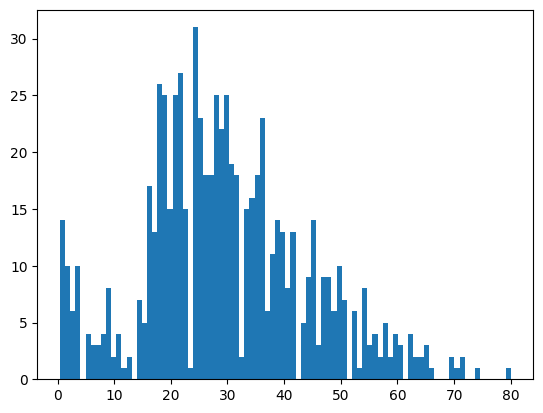

In [17]:
import matplotlib.pyplot as plt

plt.hist(age, bins=len(counts))
print(f"The standard deviation is: {numpy.nanstd(age)}")

Die Daten sind nach links verschoben und die Datenpunkte im unteren Ende sind häufiger vertreten als die am oberen Ende.

10. Frage: Woher könnte die fehlende Symmetrie herrühren?
11. Frage: Trotz der Rechtfertigungen in der Vorlesung: Welche theoretischen Probleme ergeben sich daraus, den Median für NaN einzusetzen? welche Vor- und Nachteile hätte es den Mean zu benutzen?
12. Frage: Für welche Datenkategorien eignen sich jeweils Mean, Median, Mode und Konstante als Ersatz für NaN Werte?
13. Frage: Wieso geben numpy.min(age) und numpy.max(age) NaN zurück?

Nach viel Vorrede ersetzen wir nun NaN in Age durch den Median und setzen das Ergebnis wieder in unser DataFrame ein.

In [18]:
age = numpy.nan_to_num(age, copy=True, nan=numpy.nanmedian(age))
df["Age"] = age # Übergang von Numpy zu Pandas über implizites Interface. Gefahr!
df.head(10)

,Pclass,Age,SibSp,Parch,Fare,female,C,Q
0,3,22.0,1,0,7.2500,0,0,0
1,1,38.0,1,0,71.2833,1,1,0
2,3,26.0,0,0,7.9250,1,0,0
3,1,35.0,1,0,53.1000,1,0,0
4,3,35.0,0,0,8.0500,0,0,0
5,3,28.0,0,0,8.4583,0,0,1
6,1,54.0,0,0,51.8625,0,0,0
7,3,2.0,3,1,21.0750,0,0,0
8,3,27.0,0,2,11.1333,1,0,0
9,2,14.0,1,0,30.0708,1,1,0


## Ihr erstes ML-Modell und Scikit-Learn

Als dritte und letzte Bibliothek für heute lernen wir [Scikit-Learn](https://scikit-learn.org/stable/) kennen. Scikit-Learn ist eine Machine-Learning Library, die viele grundlegende ML-Modelle und Algorithmen implementiert. Auch wenn Sie nicht alle neuen Entwicklungen in der Bibliothek widergespiegelt finden werden, so lohnt es sich doch, immer erst einmal nachzuschauen, ob diese Standardbibliothek mit ihrer ausgereiften Community und Interfaces die Funktionalität umsetzt. Glauben Sie mir, dass Sie es schätzen sollten, wenn eine Bibliothek konsistente Interfaces benutzt und einen hohen Qualitätsstandard besitzt. Falls noch nicht geschehen installieren Sie die Bibliothek via:

``` pip install scikit-learn ```

Wir werden im weiteren Verlauf der Vorlesung auf viele spezifische Funktionalitäten dieser Bibliothek eingehen. Für heute möchte ich Ihnen nur in aller Kürze einen [Entscheidungsbaum](https://scikit-learn.org/stable/modules/tree.html) ([Technische Dokumentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)) vorstellen. Für den Moment genügt es, wenn Sie sich einen Entscheidungsbaum als wiederholtes Wenn-Dann-Fragenschema vorstellen, ergo ein Entscheidungsbaum versucht diejenige Kette von Wenn-Dann-Fragen zu finden, die möglichst präzise voraussagen kann, wann jemand überlebt hat oder nicht.

In [19]:
%pip install scikit-learn
import sklearn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn import tree

data = df.to_numpy()
clf = tree.DecisionTreeClassifier(max_depth=5) # Maximal 5 Wenn-Dann-Fragen
clf.fit(data, target)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Schauen wir uns das Ergebnis mal an:

Visualization of the Decision Tree:


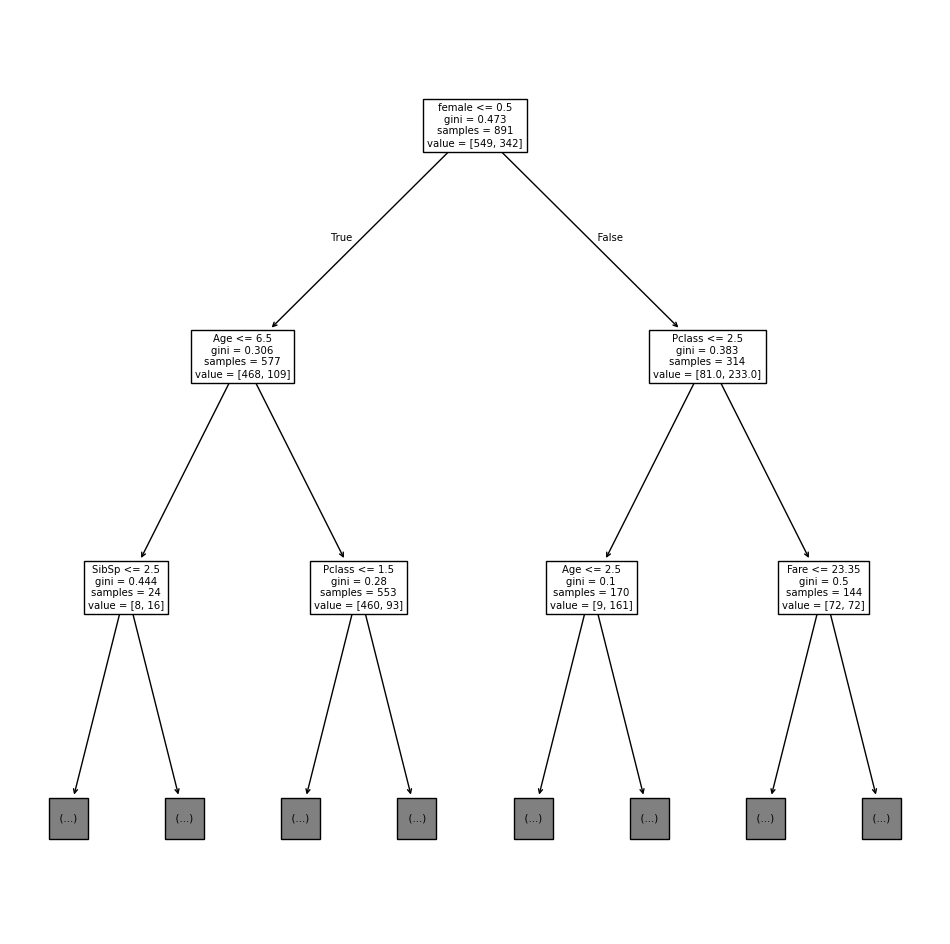

In [21]:
from matplotlib import pyplot

print("Visualization of the Decision Tree:")
pyplot.figure(figsize=(12, 12))
tree.plot_tree(clf, feature_names=df.columns, max_depth=2)
pyplot.show()

In [22]:
r = tree.export_text(clf, feature_names=df.columns)
print("Verbal Description of Decision Tree")
print(r)

Verbal Description of Decision Tree
|--- female <= 0.50
|   |--- Age <= 6.50
|   |   |--- SibSp <= 2.50
|   |   |   |--- class: 1
|   |   |--- SibSp >  2.50
|   |   |   |--- Parch <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Parch >  1.50
|   |   |   |   |--- Age <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  3.50
|   |   |   |   |   |--- class: 0
|   |--- Age >  6.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- Fare <= 26.14
|   |   |   |   |--- class: 0
|   |   |   |--- Fare >  26.14
|   |   |   |   |--- Age <= 53.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  53.00
|   |   |   |   |   |--- class: 0
|   |   |--- Pclass >  1.50
|   |   |   |--- Fare <= 51.70
|   |   |   |   |--- Age <= 13.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  13.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- Fare >  51.70
|   |   |   |   |--- Fare <= 63.02
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  63.02
|   |   | 

## Der Test-Datensatz

Wie Sie gesehen haben, haben wir alle Daten in den Entscheidungsbaum "reingeschüttet", um ihn zu trainieren (clf.fit(...)). Daher kennt der Entscheidungsbaum nun bereits alle unsere Beispieldaten. Daher wäre es unsinnig, die Qualität des Entscheidungsbaumes auf genau diesen Beispielen testen zu wollen. Aber genau dafür haben wir einen zweiten Teil des Datensatzes vorgehalten, den ich Sie am Anfang gebeten hatte zu ignorieren (test.csv)! Auf diesen müssen Sie natürlich dieselben Transformationen anwenden, die Sie auch auf den Trainingsdatensatz angewendet haben. In diesem Fall habe ich das bereits für Sie gemacht (test_transformed.csv).

14. Frage: Betrachten Sie die Spalte Age insb. den Ersatzwert für NaN in test_transformed? Was fällt Ihnen auf? Wie könnten Sie dieses Problem vermeiden? Vergleichen Sie auch mit [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) von Scikit-Learn.

Nun können wir erraten, ob unser Entscheidungsbaum für die noch nicht gesehenen Beispiele das Überleben korrekt vorhersagt und wie sich die Vorhersage mit den wahren Ereignissen vergleicht.

In [23]:
df_test = pandas.read_csv(os.path.join("titanic_data", "test.csv"))
df_test_transformed = pandas.read_csv(os.path.join("titanic_data", "test_transformed.csv"))

df_test_transformed.head(10)

,Pclass,Age,SibSp,Parch,Fare,female,C,Q
0,3,34.5,0,0,7.8292,0,0,1
1,3,47.0,1,0,7.0000,1,0,0
2,2,62.0,0,0,9.6875,0,0,1
3,3,27.0,0,0,8.6625,0,0,0
4,3,22.0,1,1,12.2875,1,0,0
5,3,14.0,0,0,9.2250,0,0,0
6,3,30.0,0,0,7.6292,1,0,1
7,2,26.0,1,1,29.0000,0,0,0
8,3,18.0,0,0,7.2292,1,1,0
9,3,21.0,2,0,24.1500,0,0,0


In [24]:
ground_truth = df_test["Survived"].to_numpy()
data_test = df_test_transformed.to_numpy()
predicted_truth = clf.predict(data_test)

In [25]:
ground_truth

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [26]:
predicted_truth

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [27]:
print(sklearn.metrics.classification_report(ground_truth, predicted_truth))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       260
           1       0.72      0.67      0.69       158

    accuracy                           0.78       418
   macro avg       0.76      0.75      0.76       418
weighted avg       0.77      0.78      0.77       418



## Evaluation und Abschluss

Herzlichen Glückwunsch! Sie haben erfolgreich Ihre erste Machine-Learning-Pipeline durchgestanden und ein 78% der ungesehenen Beispiele richtig erraten. Vgl. Sie bitte mit den Vorlesungsfolien für die Definitionen der hier aufgeführten Metriken.

15. Frage: Was ist das schlechtest-mögliche Ergebnis für ein Machine-Learning-Modell für das Problem eine Ja-Nein-Frage zu beantworten (hier konkret: Hat Person x die Titanic-Fahrt überlebt oder nicht?)?

Damit schließen wir die heutige Vorlesung. Für weitere Fragen kontaktieren Sie mich gerne unter tim.barz-cech@th-luebeck.de. Ansonsten freue ich mich wie immer über ihr Feedback und wir sehen uns beim nächsten Termin! Wie bereits geübt gilt: Sie haben diese Vorlesung aller Wahrscheinlichkeit nach verstanden, wenn Sie alle Fragen selbstständig ohne Hilfsmittel beantworten können. Bitte wiederholen Sie die Vorlesung frühzeitig, damit Sie nicht zur Prüfungszeit in zu großen Stress geraten.

Solange haben Sie eine schöne Zeit!